# ODSC Lab 2: Quantum Entangler 

An additional power of quantum is that we can entangle two particles or pieces of information together such that having the knowledge of one piece will provide us with knowledge about the other. There are different ways in which we can generate entanglement using quantum gates, but the one requirement is that we utilize two-qubit gates. These gates are actually difficult to implement physically and therefore, remain a limitation of near-term quantum computing. Thus, it is important that we find ways to create short depth circuits that use less two-qubit gates. 

In this lab, we will construct a quantum circuit that creates a Bell State for two-qubits, which is what we know as perfect or maximum entanglement. For a challenge, you may also add on qubits and see how this entanglement becomes harder to generate with an increased number of qubits! 

## Necessary Imports

In [11]:
#load the necessary packages and libraries
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
import matplotlib.pyplot as plt
from random import *
import numpy as np
import math
import matplotlib.pyplot as plt

qvm = api.QVMConnection()  

## Pyquil Notation Tricks 

In [10]:
n_qubits = 1 #Sets the number of qubits or coin flips 

theta = math.pi #Sets the 1-qubit gate rotation angle thetea to pi

main_program = Program() #Creates a quantum circuit program 

main_program += H(0) #Performs a Hadamard Gate on the 0th qubit 

main_program += X(0) #Performs a Not Gate on the 0th qubit 

main_program += CNOT(0,1) #Performs a Controlled-Not Gate with 0th qubit as the control and the 1st qubit as the target

main_program += RZ(theta, 0) #Performs a Pauli Z Rotation by angle theta on the 0th qubit 

main_program += RX(theta, 0) #Performs a Pauli X Rotation by angle theta on the 0th qubit 

main_program += RY(theta, 0) #Performs a Pauli Y Rotation by angle theta on the 0th qubit 

wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction

probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution

## Circuit 1: Two Qubit Entangler 

In order to entangle two qubits, we need to utilize a two qubit CNOT gate as well as our single qubit rotation gates. We are looking to generate the state with an equal probability on '00' and '11'. 

In [9]:
main_program = Program() #Creates a quantum circuit program 
main_program += H(0) #Performs a Hadamard Gate on the 0th qubit
main_program += CNOT(0,1) #Performs a CNOT Gate on the control 0th qubit to the target 1st qubit
wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction
probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution
print(probs_dist)

{'00': 0.4999999999999999, '01': 0.0, '10': 0.0, '11': 0.4999999999999999}


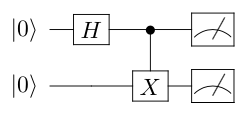

## Circuit 2: The Challenge

Try to generate entanglement with larger numbers of qubits. For example, try to create the state of an equal probability for '0000' and '1111'. Below is not a solution as this is very hard to generate without the help of a classical algorithm to find our optimal rotation angles to do this. This is actually a place where machine learning can help quantum! Have a go in playing around with the angles below and introduce new gates! 

In [8]:
main_program = Program() #Creates a quantum circuit program 
main_program += H(0) #Performs a Hadamard Gate on the 0th qubit
main_program += H(2) #Performs a Hadamard Gate on the 2nd qubit
main_program += CNOT(0,1) #Performs a CNOT Gate on the control 0th qubit to the target 1st qubit
main_program += CNOT(2,3) #Performs a CNOT Gate on the control 2nd qubit to the target 3rd qubit
wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction
probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution
print(probs_dist)

{'0000': 0.2499999999999999, '0001': 0.0, '0010': 0.0, '0011': 0.2499999999999999, '0100': 0.0, '0101': 0.0, '0110': 0.0, '0111': 0.0, '1000': 0.0, '1001': 0.0, '1010': 0.0, '1011': 0.0, '1100': 0.2499999999999999, '1101': 0.0, '1110': 0.0, '1111': 0.2499999999999999}
